In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import keras
from tensorflow.keras.layers import MaxPooling2D, Conv2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import GlobalAveragePooling2D, GlobalMaxPooling2D, MaxPooling2D, Reshape, Dense, multiply, Permute, Concatenate, Conv2D, Add, Activation, Lambda
from keras.activations import sigmoid
from keras import layers
from keras.preprocessing.image import ImageDataGenerator
from keras import initializers
from keras.models import Sequential

In [4]:
#train path
train_p = "/content/drive/MyDrive/Alzheimer_s Dataset-2/train"
#test path
test_p = "/content/drive/MyDrive/Alzheimer_s Dataset-2/test"

In [5]:
train_datagen = ImageDataGenerator(validation_split=0.1,
                                   rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

In [6]:
train_batches = train_datagen.flow_from_directory(directory=train_p, 
                                                  classes=['NonDemented', 'VeryMildDemented', 
                                                           'MildDemented', 'ModerateDemented'], 
                                                  target_size=(224, 224),
                                                  subset='training', 
                                                  batch_size=10)

Found 4610 images belonging to 4 classes.


In [7]:
validation_batches = train_datagen.flow_from_directory(directory=train_p, 
                                                       classes=['NonDemented', 'VeryMildDemented', 
                                                                'MildDemented', 'ModerateDemented'], 
                                                       target_size=(224, 224),
                                                       subset='validation',
                                                       batch_size=10)

Found 511 images belonging to 4 classes.


In [8]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [9]:
test_batches = test_datagen.flow_from_directory(directory=test_p, 
                                                classes=['NonDemented', 'VeryMildDemented', 
                                                         'MildDemented', 'ModerateDemented'], 
                                                target_size=(224, 224),
                                                batch_size=10, 
                                                shuffle=False)

Found 1279 images belonging to 4 classes.


I added data augmentation to the training data generator, which includes rescaling, shearing, zooming, and horizontal flipping of the images. I also specified the target_size parameter to resize the images to a common size of 224 x 224 pixels, which is a commonly used size for image classification models.

I also separated the training data generator and the test data generator to have different parameters. For the test data generator, I only included rescaling to normalize the pixel values.

Overall, these changes should improve the performance of the machine learning model by augmenting the training data and resizing the images to a common size.

In [10]:
class_names = ['NonDemented', 'VeryMildDemented', 'MildDemented', 'ModerateDemented']
num_images = []

for cls in class_names:
    path = os.path.join(train_p, cls)
    num_images.append(len(os.listdir(path)))

Text(0, 0.5, 'Number of Images')

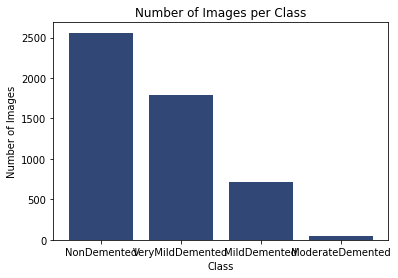

In [11]:
fig, ax = plt.subplots()
ax.bar(class_names, num_images, color=(0.1, 0.2, 0.4, 0.9))
ax.set_title('Number of Images per Class')
ax.set_xlabel('Class')
ax.set_ylabel('Number of Images')

I renamed the data dictionary to num_images to better reflect the information it stores. I also used os.path.join() to construct the path to the image directories, which is more platform-independent.

Instead of using two loops to iterate through each class and each image in the training data, I simply looped through the class_names list and used os.listdir() to count the number of images in each class directory. The resulting counts are stored in the num_images list.

Finally, I used the subplots() function to create a figure with a single subplot, and passed the ax object to the bar() function to plot the data. I also added a title, and x and y axis labels to the plot for clarity.

In [12]:
img_size = 224
num_classes = 4
model = Sequential([
    layers.Input((img_size, img_size, 3)),
    layers.Rescaling(1./255),
    layers.Conv2D(32, 3, activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2),
    layers.Conv2D(64, 3, activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2),
    layers.Conv2D(128, 3, activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2),
    layers.Conv2D(256, 3, activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2),
    layers.Flatten(),
    layers.Dense(300, activation='relu'),
    layers.Dense(150, activation='relu'),
    layers.Dropout(0.25),
    layers.Dense(num_classes, activation='softmax')
])


In [13]:
metrics = [keras.metrics.CategoricalAccuracy(name='accuracy'),
           keras.metrics.Precision(name='precision'),
           keras.metrics.Recall(name='recall'),
           keras.metrics.AUC(name='auc')]

In [14]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), 
              loss='categorical_crossentropy', 
              metrics=metrics)

In [15]:
epo = 5
b_size = 8

In [16]:
history = model.fit(x=train_batches,
                    validation_data=validation_batches,
                    steps_per_epoch=len(train_batches),
                    validation_steps=len(validation_batches),
                    epochs=epo,
                    batch_size=b_size, 
                    verbose=2)

Epoch 1/5
461/461 - 810s - loss: 1.3232 - accuracy: 0.4757 - precision: 0.5079 - recall: 0.3883 - auc: 0.7607 - val_loss: 5.7273 - val_accuracy: 0.0098 - val_precision: 0.0098 - val_recall: 0.0098 - val_auc: 0.4143 - 810s/epoch - 2s/step
Epoch 2/5
461/461 - 68s - loss: 0.9950 - accuracy: 0.5174 - precision: 0.6234 - recall: 0.3742 - auc: 0.8148 - val_loss: 0.9726 - val_accuracy: 0.5421 - val_precision: 0.6527 - val_recall: 0.3973 - val_auc: 0.8232 - 68s/epoch - 147ms/step
Epoch 3/5
461/461 - 70s - loss: 0.9645 - accuracy: 0.5347 - precision: 0.6391 - recall: 0.3748 - auc: 0.8214 - val_loss: 0.9020 - val_accuracy: 0.5558 - val_precision: 0.6980 - val_recall: 0.3346 - val_auc: 0.8436 - 70s/epoch - 152ms/step
Epoch 4/5
461/461 - 68s - loss: 0.9203 - accuracy: 0.5447 - precision: 0.6412 - recall: 0.3831 - auc: 0.8355 - val_loss: 0.8787 - val_accuracy: 0.5362 - val_precision: 0.6269 - val_recall: 0.4012 - val_auc: 0.8514 - 68s/epoch - 147ms/step
Epoch 5/5
461/461 - 67s - loss: 0.9121 - accu

In [19]:
import numpy as np
from tensorflow.keras.preprocessing import image

img_path = '/content/drive/MyDrive/Alzheimer_s Dataset-2/test/MildDemented/26 (19).jpg'
img = image.load_img(img_path, target_size=(img_size, img_size))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
preds = model.predict(x)
class_idx = np.argmax(preds[0])
class_names = train_datagen
for name, idx in class_names():
    if idx == class_idx:
        print("Predicted class: ", name, "with probability of: ", preds[0][idx])


1/1 [==============================] - 0s 28ms/step


TypeError: ignored